# Analyzing the ticket "NVDA" - NVIDIA Corporation

## Introduction
According to the [Wikipedia](https://www.investopedia.com/terms/s/silver.asp):
>Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California. It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market.

---
## Table of Contents:
+ General Analisys
  1. Term Usages per subreddit
  2. Up Vote Ration in each subreddit
  3. Numer of posts related to the term over time
  4. Comparison between close price and number of posts 
+ Sentiment Analisys
  1. Overall distribution of sentiments
  2. Sentiment per subReddit
  3. Mean awards and upVotes
  4. Sentiment over time
  5. Sentiment and the stock market

### Loading dataset

In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine("sqlite:///db/reddit_financial.db")
df = pd.read_sql_query(
    "SELECT * FROM reddit_data WHERE title LIKE '%NVDA%' OR title LIKE '%NVIDIA%'OR selftext LIKE '%NVDA%' OR selftext LIKE '%NVIDIA%'",
    con=engine,
    parse_dates=[
        'created',
        'retrieved',
        'edited',
    ],
    index_col = "id"
)

In [2]:
df.head()

,author,created,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
id,,,,,,,,,,,,,,,,,,,,,
lhkdk4,diamonski,2021-02-11 13:12:21,2021-02-28 16:54:00,1970-01-01 00:00:00,0,0,0,0,0,1,...,3,0,want highlight opinion article first positive ...,self,https://redd.it/lhkdk4,gme,100.0,positive,2.0,positive
lo155d,BearishDieVirgins,2021-02-20 06:30:29,2021-02-28 16:56:18,2021-02-20 06:35:35,0,0,0,0,0,1,...,10,0,actual cloud gaming service work gear toward e...,self,https://redd.it/lo155d,gme,16.0,positive,0.0,neutral
lpferb,xjsbx,2021-02-22 04:49:20,2021-02-28 16:56:44,1970-01-01 00:00:00,0,0,0,0,0,1,...,2,0,something mind lately exactly gamestop new dir...,self,https://redd.it/lpferb,gme,-1.0,negative,0.0,neutral
lpkyme,bannerlordthrow,2021-02-22 10:36:52,2021-02-28 16:56:47,2021-02-22 11:19:57,0,0,0,0,0,1,...,10,0,quick look price gme store newegg website than...,self,https://redd.it/lpkyme,gme,10.0,positive,0.0,neutral
lpl400,ShamanskEE1,2021-02-22 10:46:37,2021-02-28 16:56:47,2021-02-22 10:51:15,0,0,0,0,0,1,...,2,0,trade year digital forbiden stuff lately use f...,self,https://redd.it/lpl400,gme,19.0,positive,0.0,neutral


In [3]:
df.shape

(691, 28)

## General Analisys
In this first part, we are going to analyze quantitative data related to the term.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

### Term Usages per subreddit

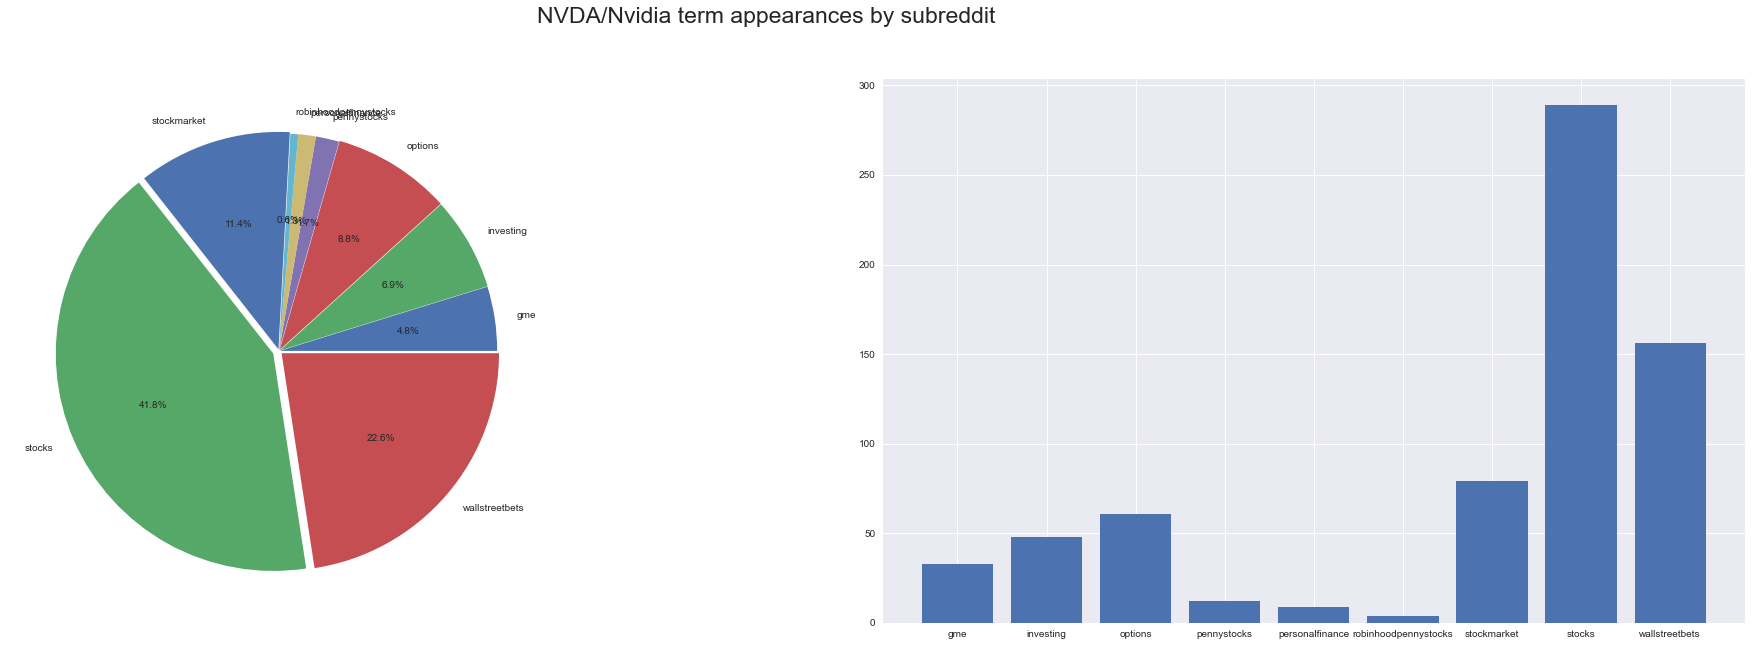

In [5]:
#Number of term usages in each subreddit
subreddits = df.subReddit.unique()
subreddits_count = []
explode = []
for key in subreddits:
    size = len(df[df["subReddit"] == key])
    subreddits_count.append(size)
    explode.append(size/10000)

#Plotting
plt.style.use('seaborn')

fig, axs = plt.subplots(1,2,figsize=(34,10))
fig.suptitle("NVDA/Nvidia term appearances by subreddit",size=23)

axs[0].pie(subreddits_count,labels=subreddits,autopct='%1.1f%%',explode=explode)
axs[1].bar(subreddits,subreddits_count)

plt.show()

### Up Vote Ration in each subreddit

Text(0.5, 1.0, 'Up Vote ratio in each subreddit')

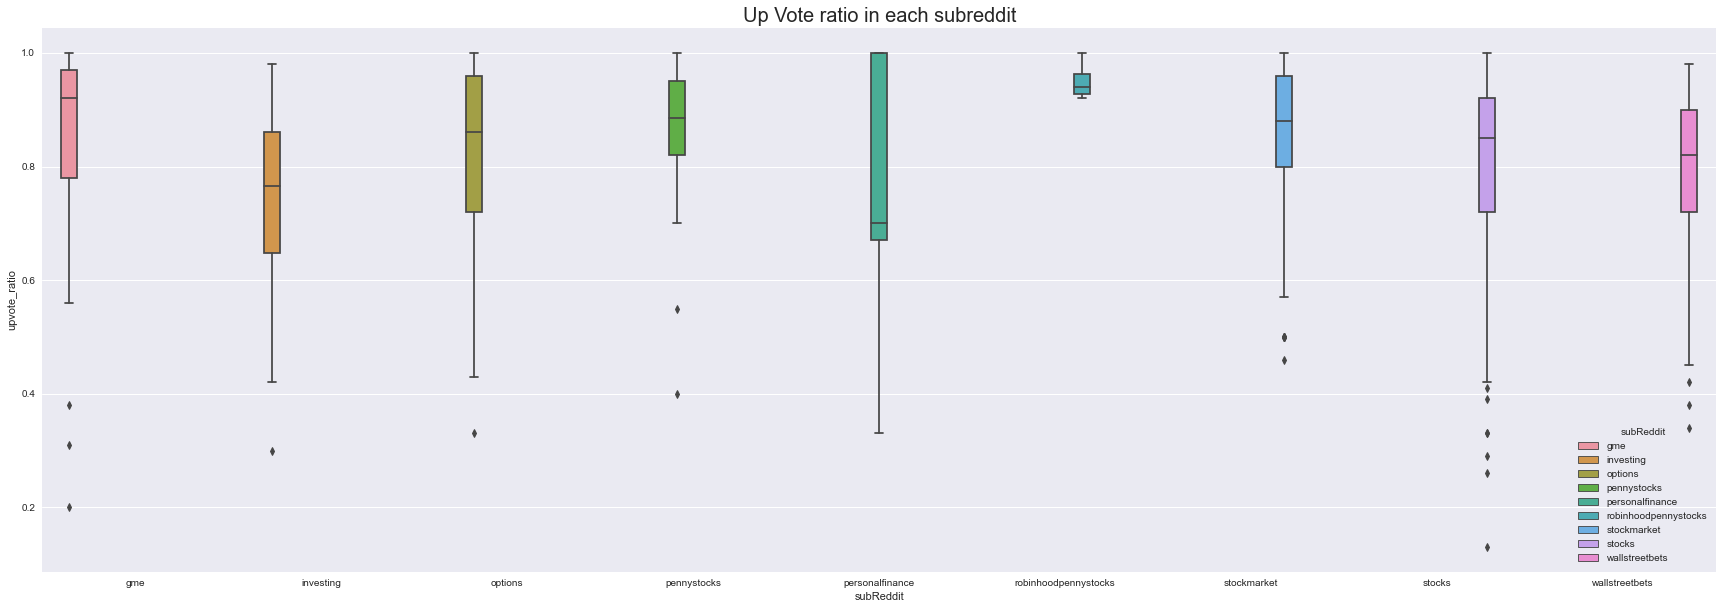

In [6]:
#Up Vote ratio in each subreddit
plt.figure(figsize=(30,10))
sns.boxplot(data=df,x="subReddit",y='upvote_ratio',hue="subReddit")
plt.title("Up Vote ratio in each subreddit",size=20)

#### Numer of posts related to the term over time

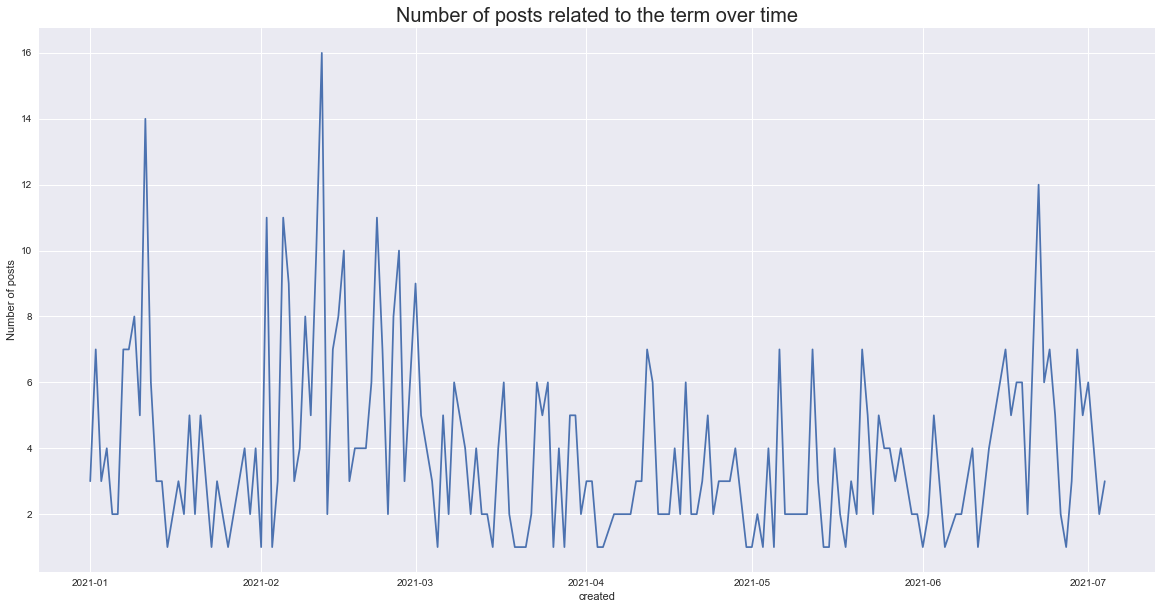

In [7]:
#Occorencies over time

#Cleaning timestamp to achieve a better grouping
df['created'] = pd.to_datetime(df['created']).dt.normalize()


posts_byData = df.groupby('created').count()

plt.figure(figsize=(20,10))
sns.lineplot(data=posts_byData,x="created",y="retrieved")
plt.title("Number of posts related to the term over time",size=20)
plt.ylabel("Number of posts")
plt.show()

In [8]:
posts_byData.head()

,author,retrieved,edited,pinned,archived,locked,removed,deleted,is_self,is_video,...,num_comments,num_crossposts,selftext,thumbnail,shortlink,subReddit,SentimentAFINN_body,SentimentAFINN_class_body,SentimentAFINN_title,SentimentAFINN_class_title
created,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2021-01-02,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
2021-01-03,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2021-01-04,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2021-01-05,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [10]:
#Comparing to the stock-market data
import yfinance as yf

start_date = min(df.created)
end_date = max(df.created)

#Using yahoo API
nvdaDATA = yf.download(["NVDA"], start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed


#### Comparison between close price and number of posts 

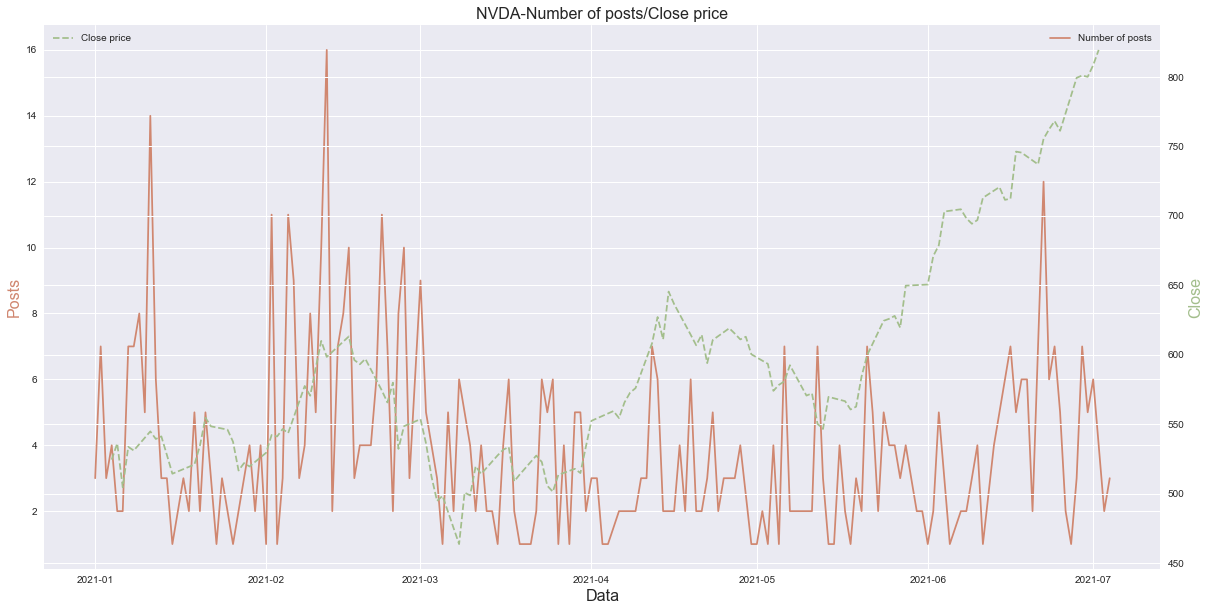

In [12]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('NVDA-Number of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#D08770")

ax1 = sns.lineplot(data=posts_byData,x="created",y="retrieved",color="#D08770",label="Number of posts")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#A3BE8C")
ax2 = sns.lineplot(data=nvdaDATA,x="Date",y="Close",label="Close price",color="#A3BE8C")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("--")

#Display
plt.legend(loc='upper left')
plt.show()




## Sentiment Analysis
The AFFIN library was used to both analyze and classify all posts and titles. 
In this next topic, we are going to analyze this data.

### Overall distribution of sentiments

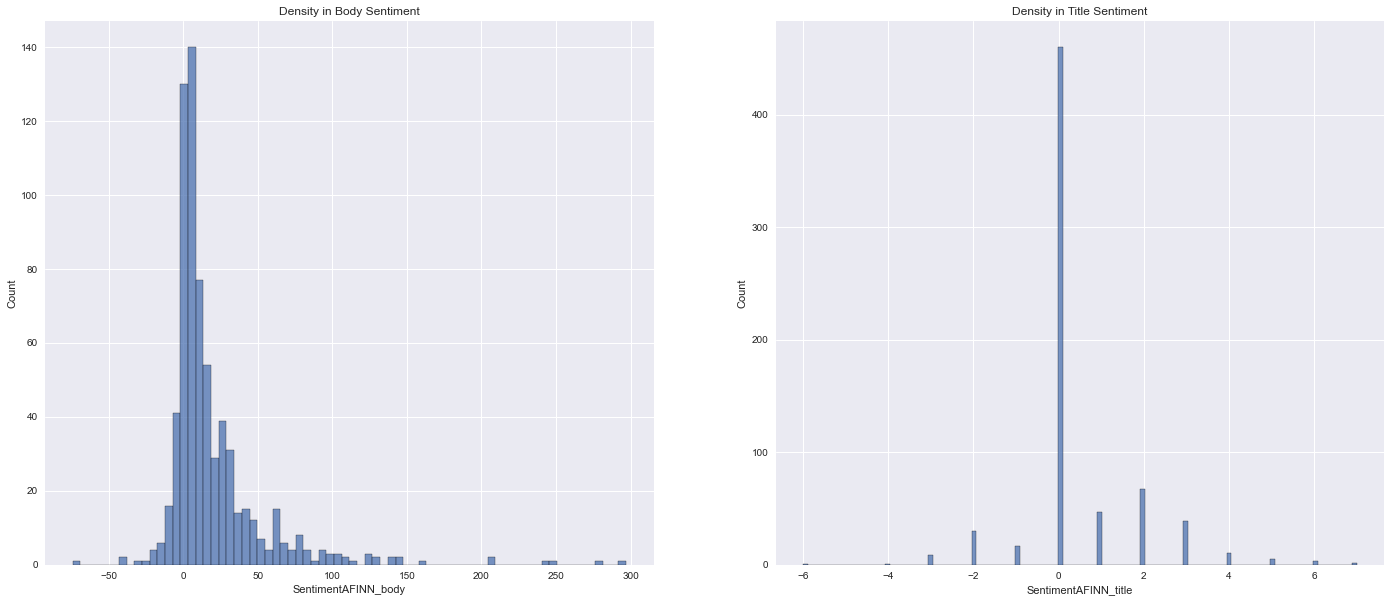

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(24,10))
sns.histplot(df.SentimentAFINN_body, label = 'polarity', ax=axs[0]);
sns.histplot(df.SentimentAFINN_title, label = 'polarity', ax=axs[1]);
axs[0].title.set_text('Density in Body Sentiment');
axs[1].title.set_text('Density in Title Sentiment');
plt.show()

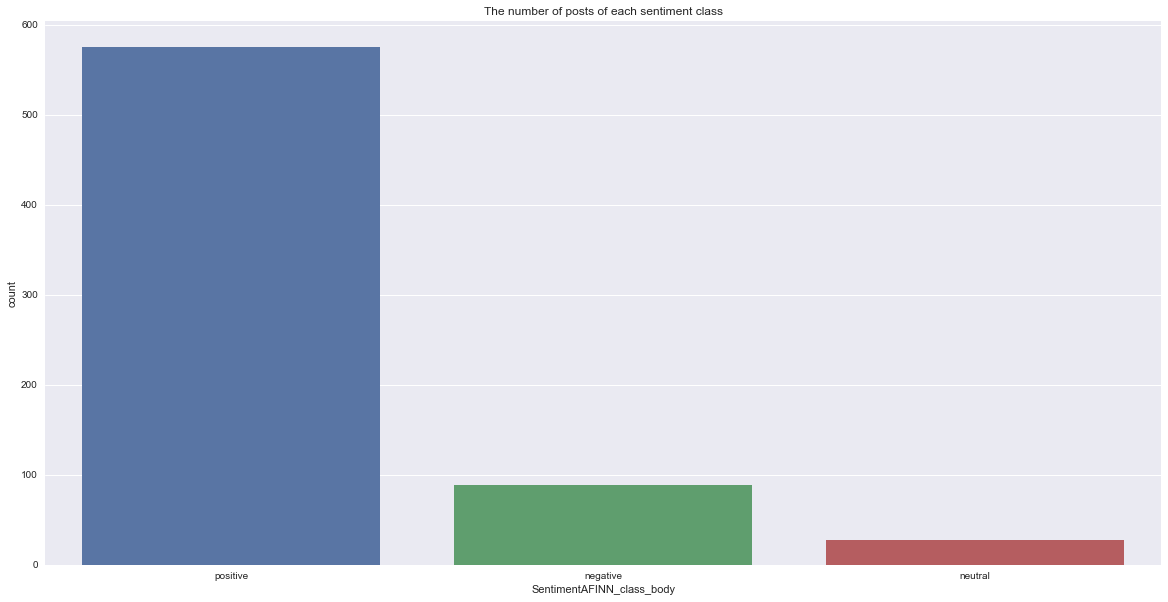

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x='SentimentAFINN_class_body', data=df);
plt.title("The number of posts of each sentiment class")
plt.show()

### Sentiment per subReddit

Text(0.5, 1.0, 'Post Sentiment per subReddit')

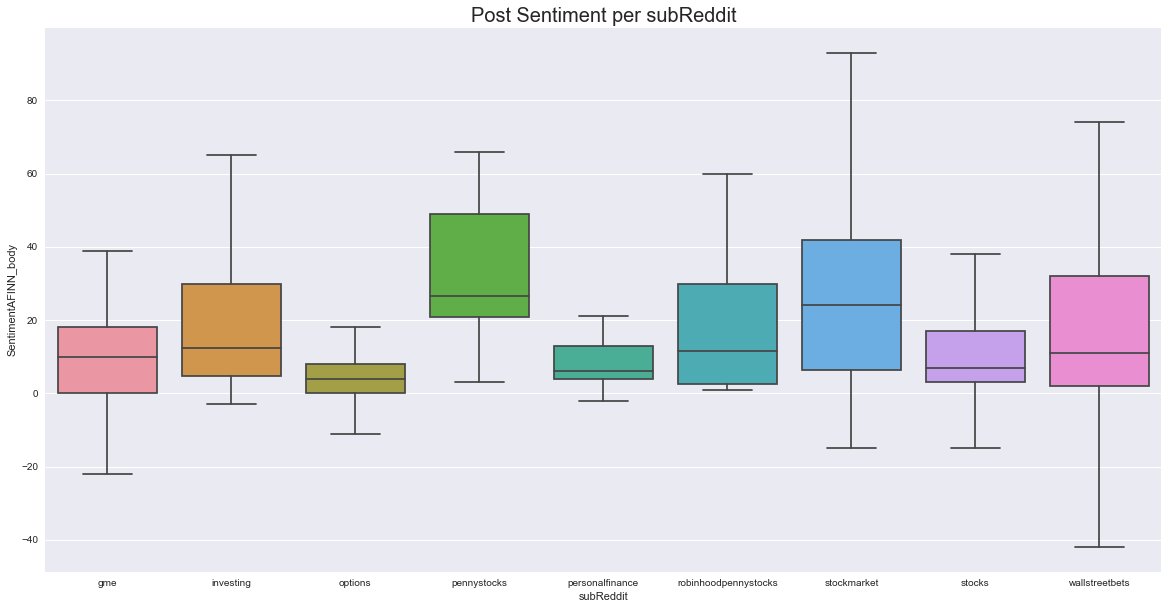

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(x="subReddit",y="SentimentAFINN_body",data=df, showfliers = False)
plt.title("Post Sentiment per subReddit",size=20)

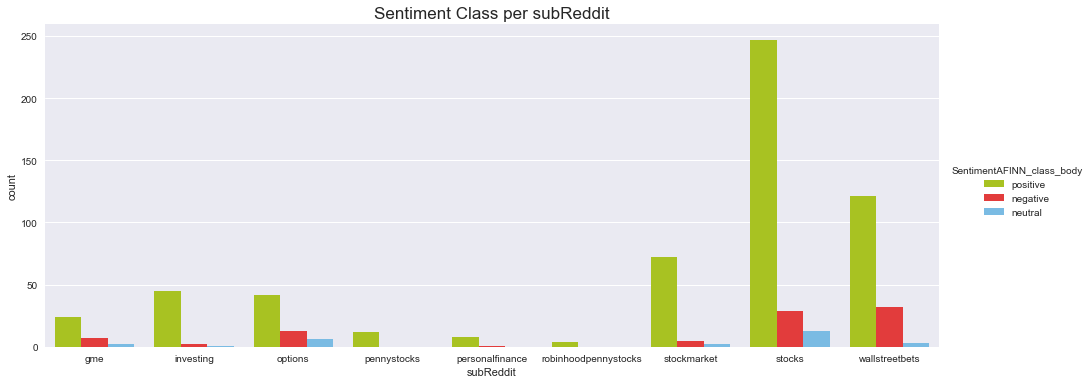

In [16]:
sns.catplot(x="subReddit", hue="SentimentAFINN_class_body", data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"}, aspect=21.7/8.27)
plt.title("Sentiment Class per subReddit",size=17)
plt.show()

### Mean awards and upVotes

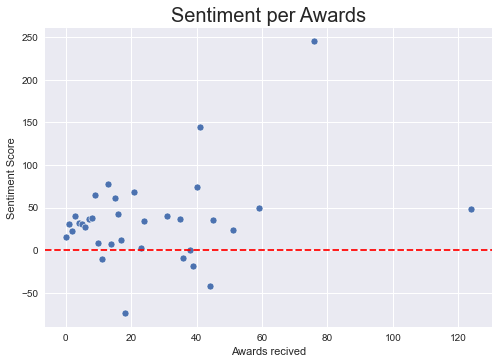

In [17]:
mean_TotalAwards = df.groupby('total_awards_received').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Awards recived")
plt.ylabel("Sentiment Score")
plt.show()

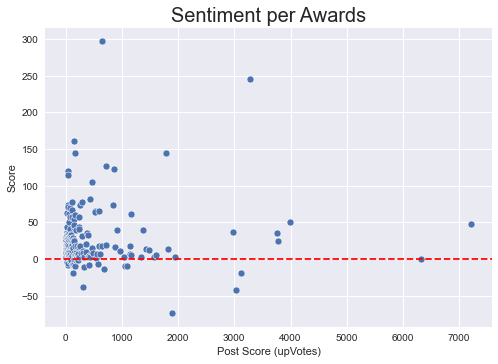

In [18]:
mean_TotalAwards = df.groupby('score').mean()
sns.scatterplot(x=mean_TotalAwards.index, y="SentimentAFINN_body", data=mean_TotalAwards)
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Sentiment per Awards",size=20)
plt.xlabel("Post Score (upVotes)")
plt.ylabel("Score")
plt.show()

### Sentiment over time 

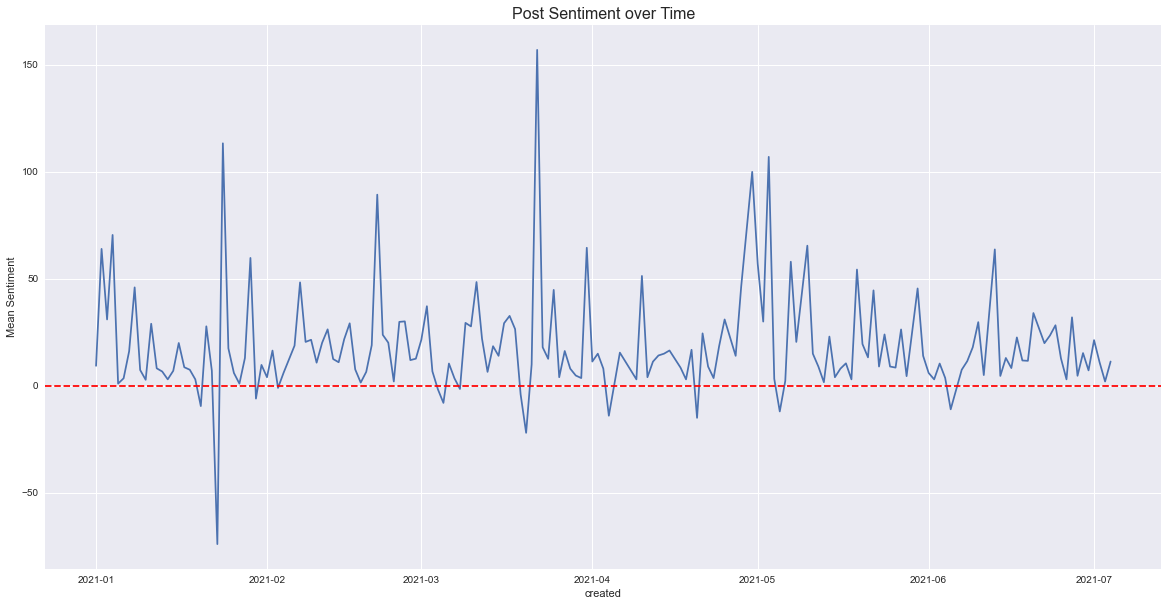

In [19]:
plt.figure(figsize=(20,10))
mean_sentiments = df.groupby('created').mean()
sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


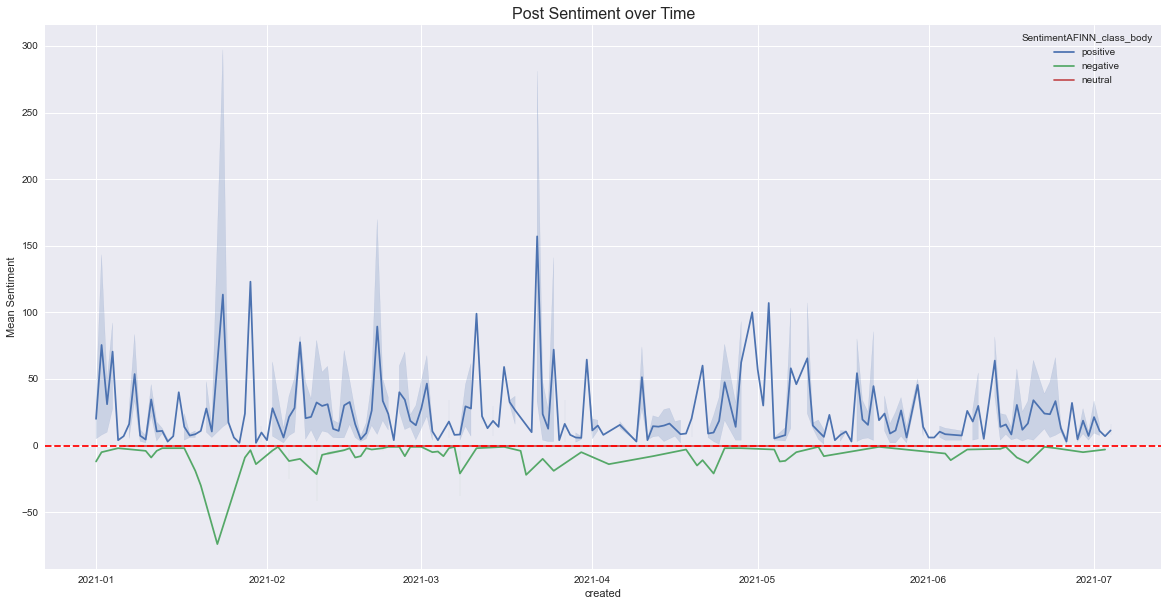

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
plt.axhline(y=0, color='r', linestyle='--');
plt.title("Post Sentiment over Time",size=16)
plt.ylabel("Mean Sentiment")
plt.show()


### Sentiment and the stock market

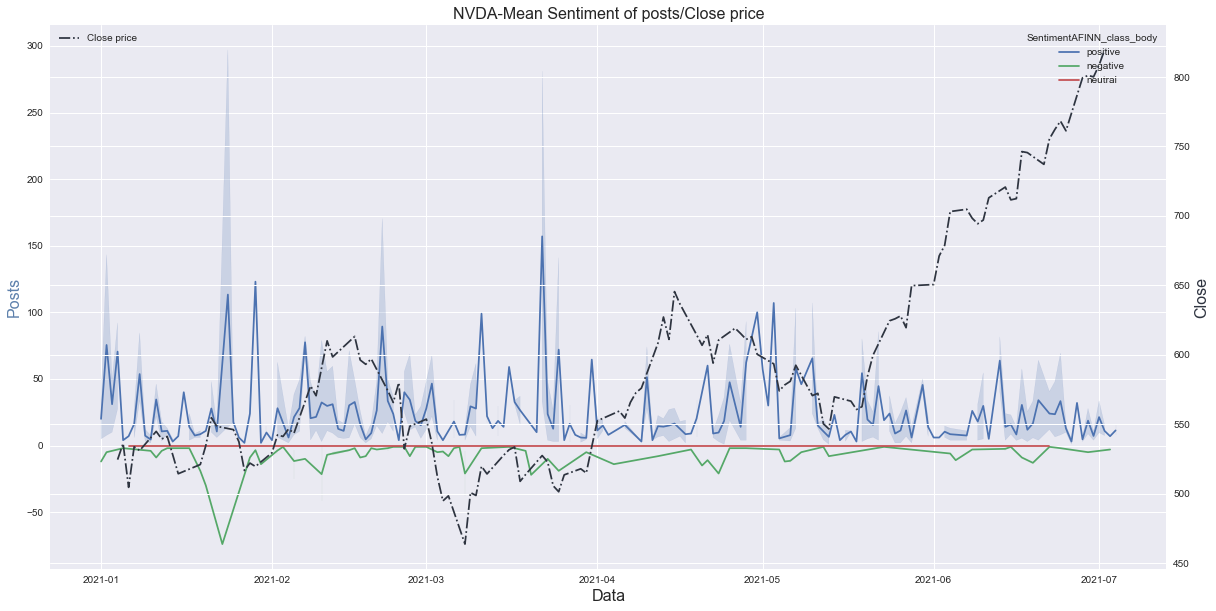

In [21]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('NVDA-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#5E81AC")

ax1 = sns.lineplot(data=df,x="created",y="SentimentAFINN_body",hue="SentimentAFINN_class_body")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=nvdaDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()

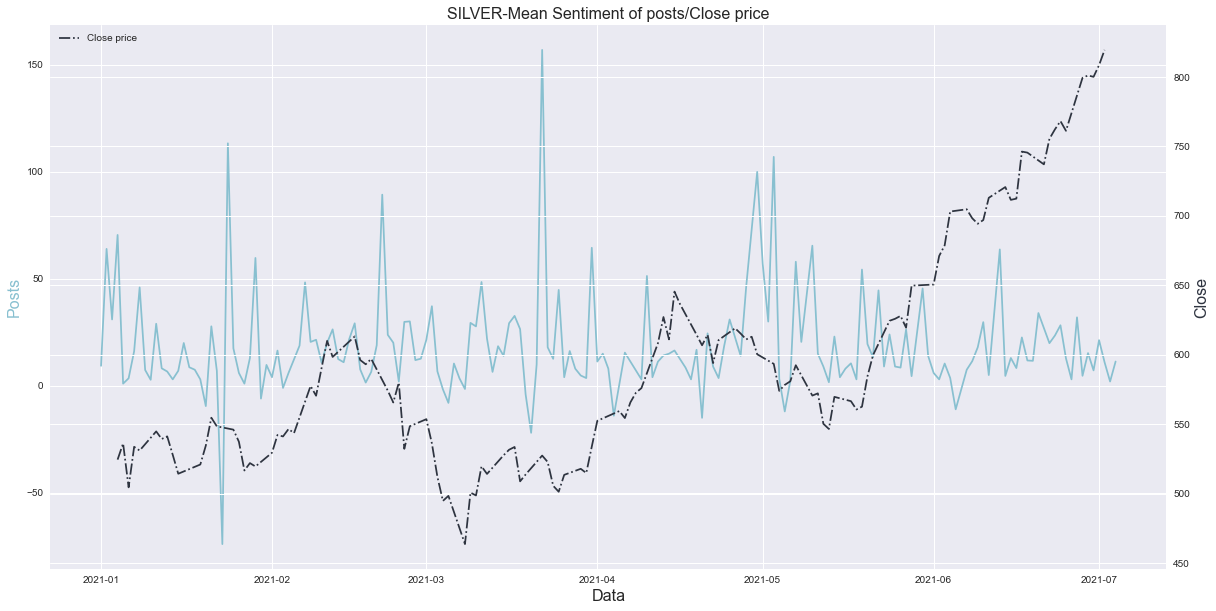

In [22]:
#Comparing close price

fig, ax1 = plt.subplots(figsize=(20,10))

#First Graph
ax1.set_title('NVDA-Mean Sentiment of posts/Close price', fontsize=16)
ax1.set_xlabel('Data', fontsize=16)
ax1.set_ylabel('Posts', fontsize=16,color="#88C0D0")

ax1 = sns.lineplot(data=mean_sentiments,x="created",y="SentimentAFINN_body",color="#88C0D0")
ax1.tick_params(axis='y')

#Second Graph
ax2 = ax1.twinx()

ax2.set_ylabel('Close', fontsize=16,color="#2E3440")
ax2 = sns.lineplot(data=nvdaDATA,x="Date",y="Close",label="Close price",color="#2E3440")
ax2.tick_params(axis='y')
ax2.lines[0].set_linestyle("dashdot")

#Display
plt.legend(loc='upper left')
plt.show()